<a href="https://colab.research.google.com/github/trex99/DAVI/blob/main/11%EC%A3%BC%EC%B0%A8_Lecture_Code_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단변량 데이터 분석과 시각화

- 일반적으로 관심의 대상이 되는 결과 값 Y가 하나인 경우의 데이터 분석

    - 모든 변수의 값, 범위 확인
    - 데이터 밀집 및 희소한 구간 확인
    - 결측치 및 이상치 확인
    - 데이터 수집 목적 등 사용 관점에서 특이 값 확인
    - 필요한 경우 데이터에 대한 스케일링 실시

## 시각화 방법

- 데이터 준비

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- sns.countplot() : 특정 변수에 대한 갯수 그래프


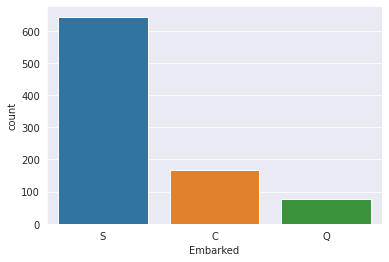

In [ ]:
sns.countplot(x=titanic.Embarked)
plt.show()

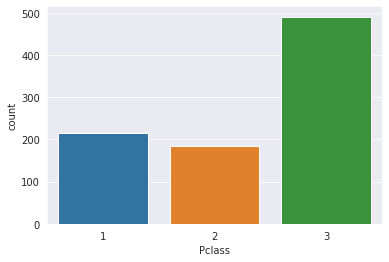

In [ ]:
sns.countplot(x=titanic.Pclass)
plt.show()

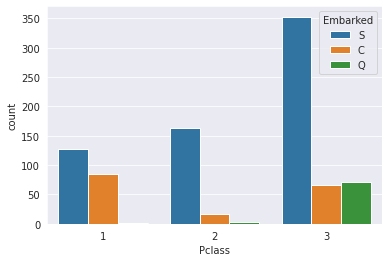

In [ ]:
sns.countplot(x=titanic.Pclass, hue=titanic.Embarked, hue_order=['S', 'C', 'Q'])
plt.show()

- sns.histplot() : 특정 변수에 대한 빈도 분포를 나타내는 그래프
  - 수집한 데이터가 정규분포를 이루고 있는지
  - 특정 구간에 빈도가 몰려 있는 비대칭적인 분포를 이루고 있는지
  - 이상한 값이 들어 있는지를 한 눈에 파악할 수 있습니다

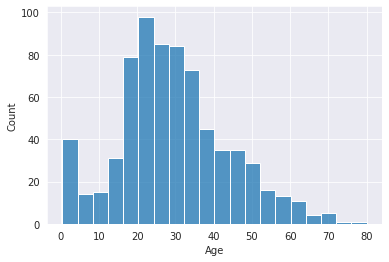

In [ ]:
sns.histplot(x=titanic.Age)
plt.show()

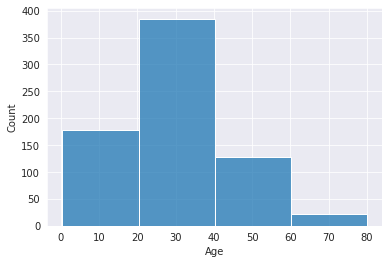

In [ ]:
sns.histplot(x=titanic.Age, bins=4)
plt.show()

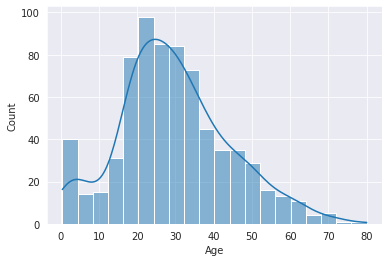

In [ ]:
sns.histplot(x=titanic.Age, kde=True)
plt.show()

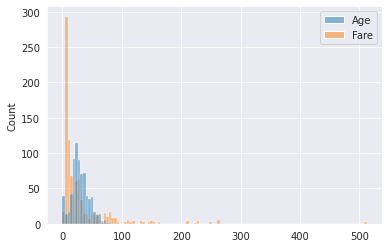

In [ ]:
sns.histplot(data=titanic[['Age', 'Fare']])
plt.show()

- sns.kdeplot() : 빈포 분포를 부드럽게 만든 그래프 (변수가 가질 수 있는 모든 값의 밀도(확률)을 추정)

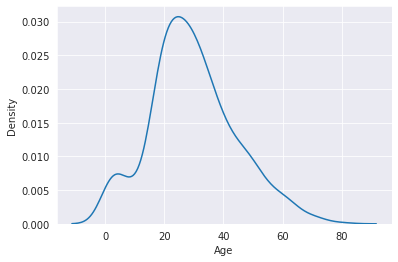

In [ ]:
sns.kdeplot(x="Age", data=titanic)
plt.show()

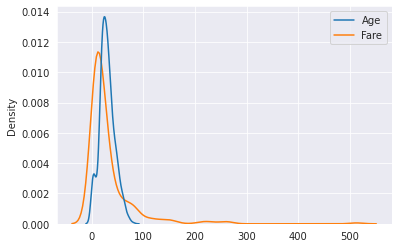

In [ ]:
sns.kdeplot(data=titanic[["Age", "Fare"]])
plt.show()

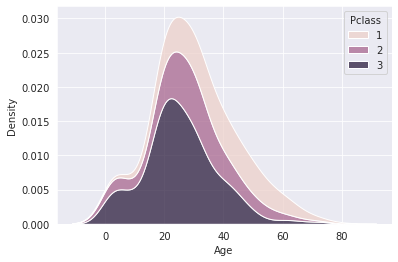

In [ ]:
sns.kdeplot(x='Age', data=titanic, hue='Pclass', multiple='stack')
plt.show()

## 커널 밀도 추정

- 커널 밀도 추정(KDE: Kernel Density Estimator) 이란 ?
  - 히스토그램(histogram)을 smoothing(스무딩)하는 것
  - 커널함수(kernel function)를 이용한 밀도추정 방법
    - 커널함수 : 원점을 중심으로 대칭이면서 적분값이 1인 Non-Negative 함수 (Gaussian, Uniform 등)
    - 밀도추정 : 표본들의 분포로부터 모집단의 (확률)분포 특성을 추정하는 것 (확률밀도)
$$\hat{f}_h (x) = {1 \over nh} \sum K ({X-X_i \over h})$$
$$n : 표본 데이터 갯수 $$
$$X : 변수 (random \ variable)$$
$$X_i : 1, 2, 3 ... 표본데이터$$
$$h : bandwidth (사용자 정의 값) $$


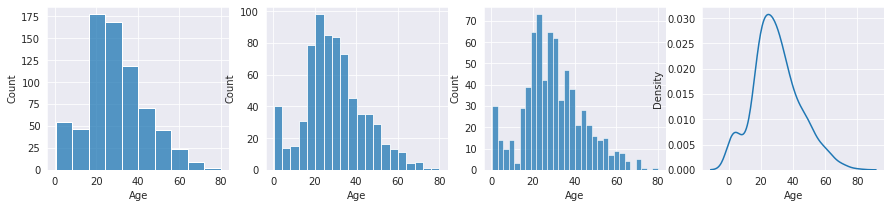

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=((15, 3)))

sns.histplot(x=titanic.Age, bins=10, ax=ax[0])
sns.histplot(x=titanic.Age, bins=20, ax=ax[1])
sns.histplot(x=titanic.Age, bins=30, ax=ax[2])
sns.kdeplot(x=titanic.Age, ax=ax[3])
plt.show()

- bins 수에 따라 막대가 나타나거나 없어집니다.
- y축 범위가 bins 값에 따라 작아집니다.

## 단변량 분석 및 시각화

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 변수분할 및 불필요한 변수 삭제
x_data = titanic[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
y_data = titanic[['Survived']]

In [4]:
# 결측치 확인
x_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
# 결측치 확인
y_data.isnull().sum()

Survived    0
dtype: int64

In [6]:
# 데이터 구조 확인
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [7]:
# 기초 통계량 확인
x_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
# 이상치
x_data[x_data['Age'] < 1]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


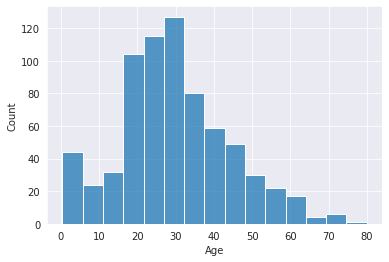

In [9]:
# 연령 히스토그램 시각화
sns.histplot(x='Age', data=x_data, bins=15)
plt.show()

- 수집한 데이터가 정규분포를 이루고 있는지
- 특정 구간에 빈도가 몰려 있는 비대칭적인 분포를 이루고 있는지
- 이상한 값이 들어 있는지를 한 눈에 파악할 수 있습니다

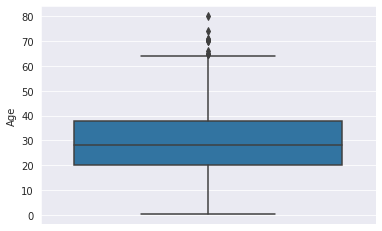

In [10]:
# 연령 박스 플롯 시각화
sns.boxplot(y=x_data['Age'])
plt.show()

- 단변량 또는 연속형 데이터의 분포(Distribution)를 설명
- 분포의 중심, 분산(Variance), 치우침(Skewness), 이상치(Outlier), 대칭성(Symmetry) 확인 가능

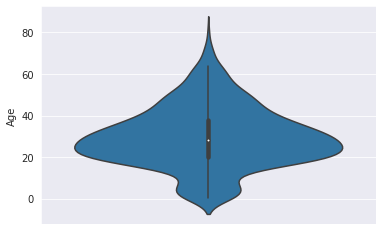

In [11]:
# 연령 바이올린 플롯 시각화
sns.violinplot(y=x_data['Age'], showmeans=True)
plt.show()

- 단변량 또는 연속형 데이터의 분포(Distribution)를 설명
- 분포의 중심, 분산(Variance), 치우침(Skewness), 이상치(Outlier), 대칭성(Symmetry) 확인 가능
- 커널 밀도 곡선(Kernel Density Curvce)와 박스 플롯을 합친 형태

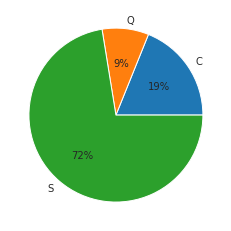

In [19]:
# 승선지별 pie plot
em_data = x_data.groupby('Embarked').apply(len)
em_data = pd.DataFrame(em_data, columns=['col_cnt'])
em_data = em_data.reset_index()
em_data

data_x = em_data['col_cnt']
labels = em_data['Embarked']
plt.pie(data_x, labels=labels, autopct='%.0f%%')
plt.show()


- 범주형 데이터(Categorical Data, Object Data) 표현
- 전체와 부분을 비교하고자 할 때 사용
- 최대 6~8개를 넘지 않게 하고, 수치를 레이블로 명확하게 표시

In [ ]:
# 범주형 변수 인코딩 (수치화) : label 인코딩
sex_data = {'male':0 , 'female': 1}
x_data['Sex'] = x_data['Sex'].map(sex_data)
x_data

<ipython-input-164-e09f59871816>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data['Sex'] = x_data['Sex'].map(sex_data)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# 범주형 변수 인코딩 (수치화) : one-hot 인코딩
x_data = pd.get_dummies(x_data, columns=['Sex'])
x_data

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,Sex_0,Sex_1
0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,1
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,1,0,1
4,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1,0,1,0
887,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0,1,0,1
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1,0,1
889,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1,0,1,0


# 다변량 데이터 분석과 시각화

- 일반적으로 관심의 대상이 되는 결과 값 Y가 2개 이상인 경우의 데이터 분석

    - 모든 변수의 값, 범위 확인
    - 데이터 밀집 및 희소한 구간 확인
    - 결측치 및 이상치 확인
    - 데이터 수집 목적 등 사용 관점에서 특이 값 확인
    - 필요한 경우 데이터에 대한 스케일링 실시
<font color=red>변수간의 관계가 특이한 값 확인</font>

## 시각화 방법

- 데이터 준비

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

house = pd.read_csv('houseprice.csv')
house.head()

,price,tax,ground,floor,year
0,12.95,98.352,34.72,19.96,4.2
1,14.75,100.416,35.31,30.00,6.2
2,13.95,90.858,22.75,23.50,4.0
3,12.95,91.146,40.50,24.64,5.4
4,14.95,101.194,44.55,22.42,4.2


- sns.scatterplot() : 2개 이상의 변수에 대한 크기나 분포 등의 관계를 나타내는 그래프 (2 num, 1 cat 또는 3 num)
  - 수치형 vs 수치형 데이터의 상관 관계를 볼 때 주로 사용합니다.
  - 점의 크기를 데이터의 수치에 따라 다르게 볼 수 있습니다.

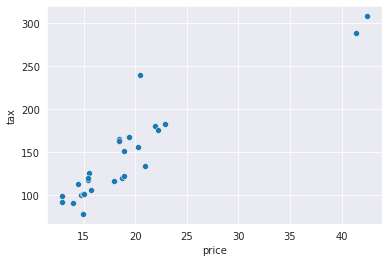

In [ ]:
sns.scatterplot(data=house, x="price", y="tax")
plt.show()

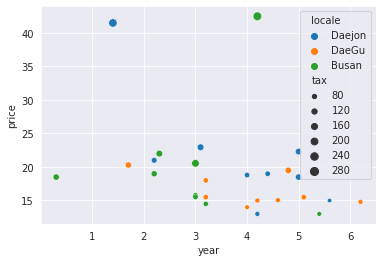

In [ ]:
sns.scatterplot(data=house, x="year", y="price", hue='locale')
plt.show()

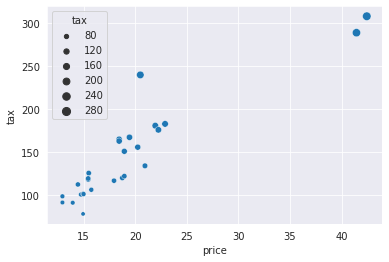

In [ ]:
sns.scatterplot(data=house, x="price", y="tax", size='tax')
plt.show()

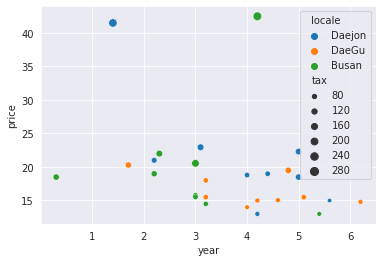

In [ ]:
sns.scatterplot(data=house, x="year", y="price", hue='locale', size='tax')
plt.show()

- sns.barplot() : 특정 변수에 대한 통계값을 나타내는 그래프 (1 num, 2 cat)
  - 막대 그래프
  - 신뢰구간(ci 값, 기본 95%) 표현 가능

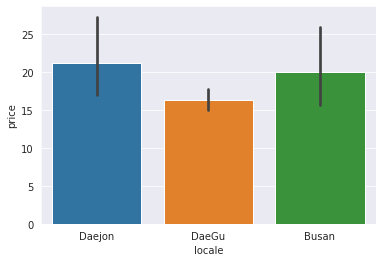

In [ ]:
sns.barplot(data=house, x="locale", y="price")
plt.show()

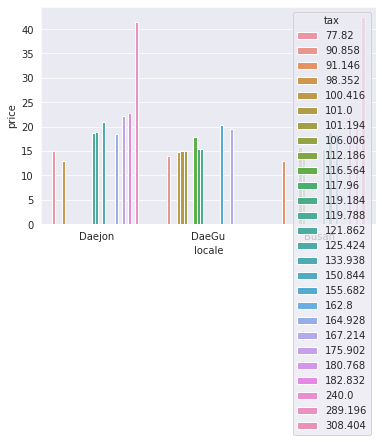

In [ ]:
sns.barplot(data=house, x="locale", y="price", hue='tax')
plt.show()

- sns.lineplot() : 특정 변수에 대한 통계값을 나타내는 그래프 (1 num, 2 cat)
  - 각 값을 연속하는 선
  - 신뢰구간 값을 그림자(음영)로 표시 (단, 모수가 적은 경우 비출력)
  - 연령, 기간, 연도 등 연속형 변수 값의 변화 폭과 추세 시각화에 유용

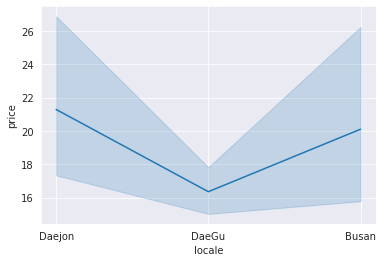

In [ ]:
sns.lineplot(data=house, x="locale", y="price")
plt.show()

- sns.pointplot() : 특정 변수에 대한 통계값을 나타내는 그래프 (1 num, 2 cat)
  - 각 수치가 위치한 곳을 점으로 출력
  - 점끼리 이어서 라인 출력

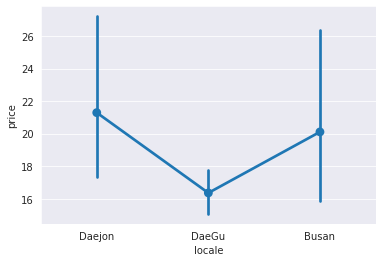

In [ ]:
sns.pointplot(data=house, x="locale", y="price")
plt.show()

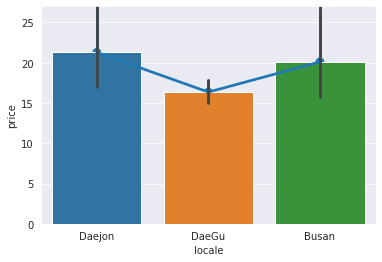

In [ ]:
plt.ylim([0, 27])
sns.pointplot(data=house, x="locale", y="price")
sns.barplot(data=house, x="locale", y="price")
plt.show()

# 시각화 방법 정리

<font size=5>[데이터 시각화](https://www.data-to-viz.com/) (https://www.data-to-viz.com/)</font>

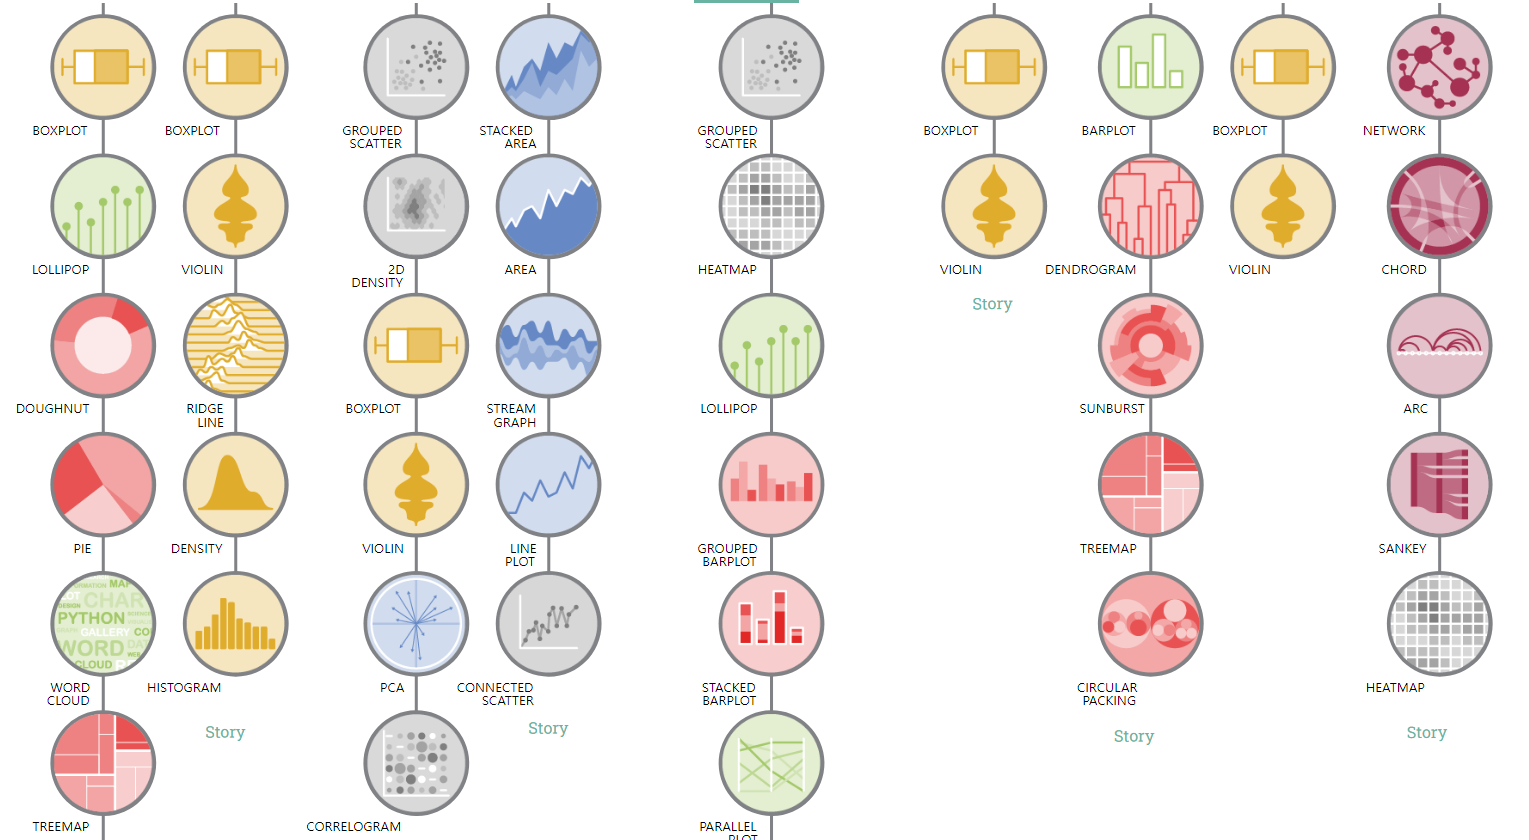

# 차원 축소와 시각화

- 차원축소 개념
  - 여러개의 데이터로 구성된 즉, 다차원의 데이터를 축소하여 특징을 찾는 기법
  - 찾아낸 특징은 원래 데이터로부터 나온 것이기 때문에 데이터로 사용 가능 (단, 오차발생)
- 용어 정비
  - 여러개의 데이터 = 컬럼이 여러개
  - 다차원 = 컬럼이 여러개
- Example

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

x_titanic = pd.read_csv('titanic.csv')
x_titanic = x_titanic.dropna()
x_titanic = x_titanic.reset_index(drop=True)
x_titanic = x_titanic[['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Survived', 'Age', 'Fare']]
x_titanic.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Survived,Age,Fare
0,1,female,1,0,C85,C,1,38.0,71.2833
1,1,female,1,0,C123,S,1,35.0,53.1000
2,1,male,0,0,E46,S,0,54.0,51.8625
3,3,female,1,1,G6,S,1,4.0,16.7000
4,1,female,0,0,C103,S,1,58.0,26.5500


In [ ]:
titanic = pd.get_dummies(x_titanic, columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked'])
titanic 

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,38.0,71.2833,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,35.0,53.1000,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,54.0,51.8625,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,4.0,16.7000,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,1,58.0,26.5500,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,1,47.0,52.5542,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
179,0,33.0,5.0000,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
180,1,56.0,83.1583,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
181,1,19.0,30.0000,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


## 주성분 분석(PCA)

### 예제

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_titanic = pca.fit_transform(titanic)

In [ ]:
pca_titanic.shape

(183, 2)

In [ ]:
# 축소한 변수로 설명가능한 비율
print('variance_ratio :', pca.explained_variance_ratio_)
print('sum of variance_ratio: ', np.sum(pca.explained_variance_ratio_))


variance_ratio : [0.95953799 0.03992594]
sum of variance_ratio:  0.9994639283412011


In [ ]:
pca_titanic_df = pd.DataFrame(pca_titanic, columns=['col_1', 'col_2'])
pca_titanic_df

,col_1,col_2
0,-7.440273,2.178401
1,-25.563654,-1.186840
2,-27.180270,17.803116
3,-61.343483,-32.917389
4,-52.564078,21.282786
...,...,...
178,-26.343860,10.788678
179,-73.617908,-4.115691
180,4.077787,20.400026
181,-48.344268,-17.635187


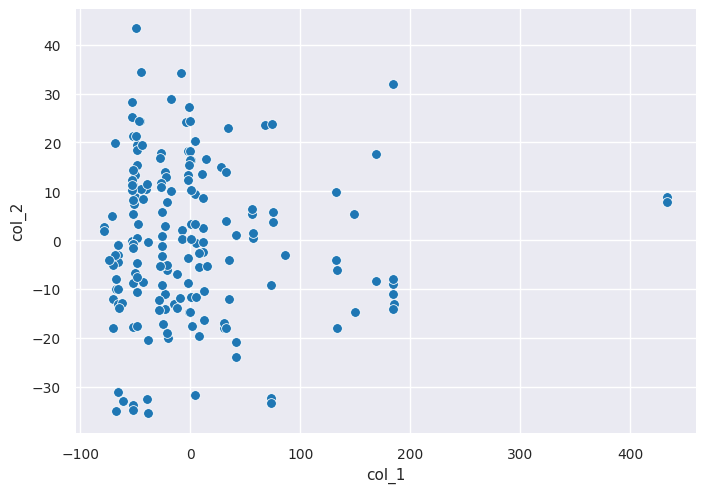

In [ ]:
sns.scatterplot(data=pca_titanic_df, x="col_1", y="col_2")
plt.show()

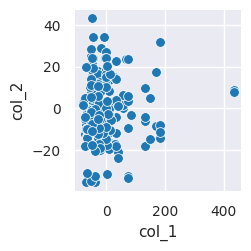

In [ ]:
sns.pairplot(data=pca_titanic_df, x_vars=['col_1'], y_vars=['col_2'])
plt.show()

In [ ]:
pca_titanic_df['Survived'] = titanic['Survived']

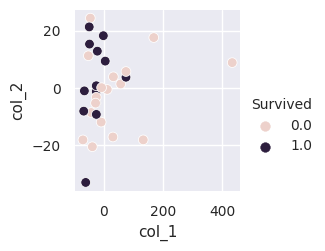

In [ ]:
sns.pairplot(data=pca_titanic_df, x_vars=['col_1'], y_vars=['col_2'], hue='Survived')
plt.show()

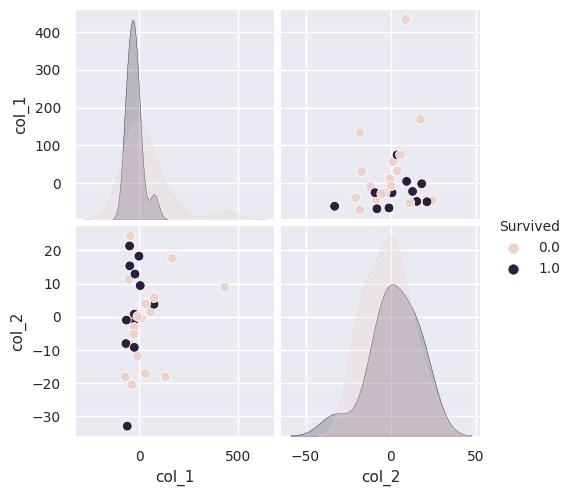

In [ ]:
sns.pairplot(data=pca_titanic_df, hue='Survived')
plt.show()

- 생존자 구별이 잘 되지는 않음.
- PCA(n_components=n) 에서 n 값을 조정하면서 축소된 데이터의 유의미성 파악

## 특이값 분해(SVD)

### 이해

In [ ]:
# SVD 모듈은 numpy에 포함되어 있음
import numpy as np
from numpy.linalg import svd

# 4x4 임의 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4, 4)
a

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.01411931,  0.6296418 ,  1.70964074, -1.32698736],
       [ 0.40187312, -0.19142667,  1.40382596, -1.96876855]])

In [ ]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', U)
print('Sigma Value:\n', Sigma)
print('V transpose matrix:\n', Vt)

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.07913928 -0.31822729  0.86653217  0.37628494]
 [ 0.38294523  0.78655287  0.12002097  0.46934262]
 [ 0.65640669  0.02243181  0.35668848 -0.66437971]
 [ 0.64515128 -0.52873697 -0.32785711  0.44353889]]
Sigma Value:
 [3.4229581  2.02287339 0.46263157 0.07935069]
V transpose matrix:
 [[ 0.04100747  0.22367823  0.78643002 -0.57429458]
 [-0.20019867  0.56209596  0.37041464  0.71187191]
 [-0.77847455  0.3945136  -0.33259252 -0.3573774 ]
 [-0.5934781  -0.69164673  0.36565426  0.18895901]]


In [ ]:
# Sima를 다시 0 을 포함한 대칭행렬로 변환 = 원래 행렬
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(a_)

[[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.18369457  1.61537293  0.36706247]
 [-0.01411931  0.6296418   1.70964074 -1.32698736]
 [ 0.40187312 -0.19142667  1.40382596 -1.96876855]]


### 예제

In [ ]:
titanic

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,0,54.0,51.8625,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
10,1,4.0,16.7000,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
11,1,58.0,26.5500,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,52.5542,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
872,0,33.0,5.0000,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
879,1,56.0,83.1583,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
887,1,19.0,30.0000,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=2)
tsvd_titanic = tsvd.fit_transform(titanic)

In [ ]:
# 축소한 변수로 설명가능한 비율
print('variance_ratio :', tsvd.explained_variance_ratio_)
print('sum of variance_ratio: ', np.sum(tsvd.explained_variance_ratio_))


variance_ratio : [0.89970364 0.09969703]
sum of variance_ratio:  0.999400668905686


In [ ]:
tsvd_titanic_df = pd.DataFrame(tsvd_titanic, columns=['col_1', 'col_2'])
tsvd_titanic_df

,col_1,col_2
0,78.248405,-20.149043
1,59.872068,-21.533198
2,63.141820,-40.281671
3,17.187197,0.016112
4,39.491579,-50.138976
...,...,...
178,62.166969,-33.299758
179,12.654559,-30.940788
180,94.028206,-34.820629
181,33.655400,-11.451509


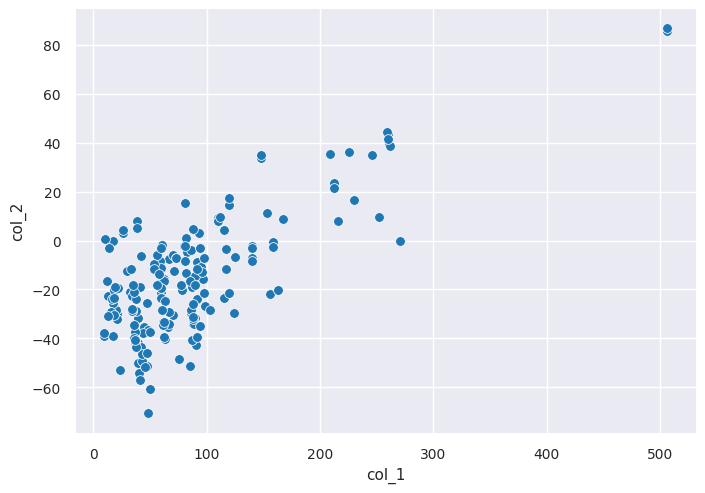

In [ ]:
sns.scatterplot(data=tsvd_titanic_df, x="col_1", y="col_2")
plt.show()

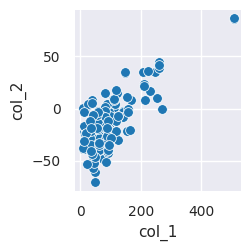

In [ ]:
sns.pairplot(data=tsvd_titanic_df, x_vars=['col_1'], y_vars=['col_2'])
plt.show()

In [ ]:
tsvd_titanic_df['Survived'] = titanic['Survived']

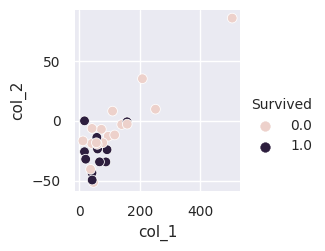

In [ ]:
sns.pairplot(data=tsvd_titanic_df, x_vars=['col_1'], y_vars=['col_2'], hue='Survived')
plt.show()

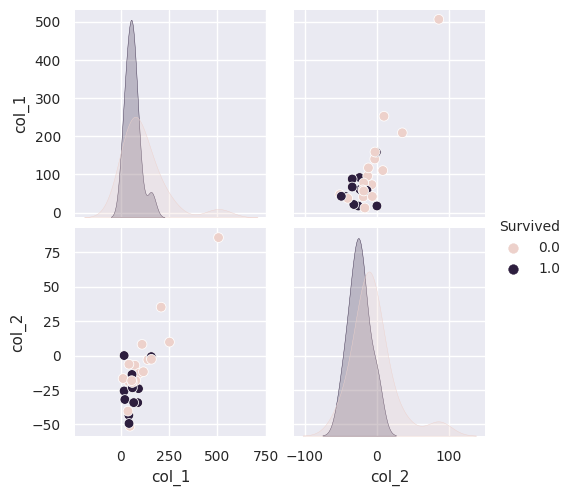

In [ ]:
sns.pairplot(data=tsvd_titanic_df, hue='Survived')
plt.show()

In [ ]:
# https://mindscale.kr/course/python-text-representation/visual-dim-red/

## t-SNE 차원 축소

### 예제

In [ ]:
titanic

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,38.0,71.2833,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,35.0,53.1000,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,54.0,51.8625,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,4.0,16.7000,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,1,58.0,26.5500,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,1,47.0,52.5542,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
179,0,33.0,5.0000,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
180,1,56.0,83.1583,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
181,1,19.0,30.0000,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_titanic = tsne.fit_transform(titanic)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
tsne_titanic_df = pd.DataFrame(tsne_titanic, columns=['col_1', 'col_2'])
tsne_titanic_df

,col_1,col_2
0,4.079507,3.257026
1,1.273421,-0.670956
2,-1.375210,0.049219
3,-12.427474,-9.245587
4,-5.025535,-6.207016
...,...,...
178,-0.582977,-0.222378
179,-13.576278,-5.607420
180,3.342062,6.543703
181,-10.560657,-8.413607


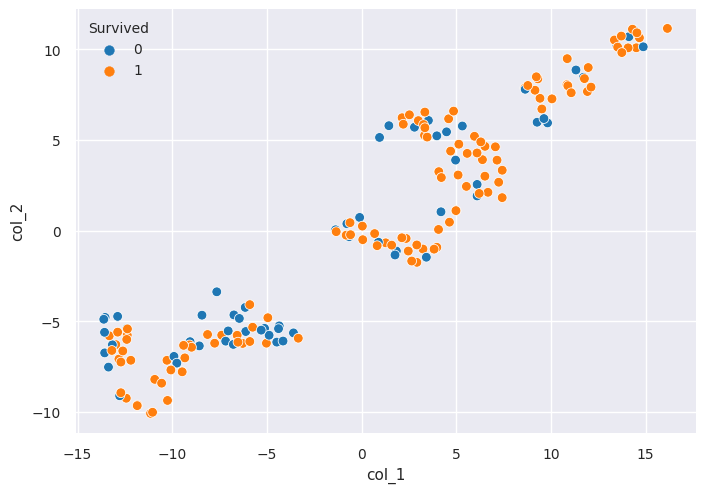

In [ ]:
sns.scatterplot(data=tsne_titanic_df, x="col_1", y="col_2")
plt.show()

In [ ]:
tsne_titanic_df['Survived'] = x_titanic['Survived']

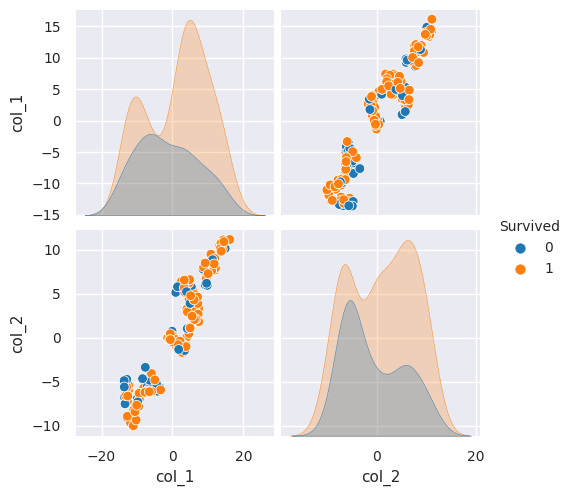

In [ ]:
sns.pairplot(data=tsne_titanic_df, hue='Survived')
plt.show()